In [1]:
import pandas as pd
import scipy.io
import numpy as np
import scipy.sparse
import os
import src.preprocessing.data_cleaning as data_cleaning
import src.preprocessing.normalization as normalization
import src.preprocessing.feature_selection as feature_selection
import src.preprocessing.dim_reduction as dim_reduction
import src.analysis.clustering as clustering
import src.analysis.cell_identification as cell_identification
import src.evaluation.evaluation as evaluation

def load_results(results_path, tissue):
    """
    Load and display the first rows of the saved results CSV.

    Parameters:
    -----------
    results_path : str
        The base directory where results are stored.
    tissue : str
        The tissue type for which results are to be loaded.

    Returns:
    --------
    pd.DataFrame
        The loaded results dataframe.
    """
    results_file_path = f'{results_path}/{tissue}_results/{tissue}_correct_results.csv'
    
    if os.path.exists(results_file_path):
        df = pd.read_csv(results_file_path)
        return df
    else:
        print(f"File not found: {results_file_path}")
        return None

C:\Users\34659\PycharmProjects\master_thesis\scRNAseq_across_human_tissues\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import src.visualization.results_visualization as visualization
from importlib import reload

In [27]:
#Load results
PBMC_results = load_results("./results", "PBMC")
print("Results loaded")

Results loaded


In [21]:
Tumor_results = load_results("./results", "Tumor")
print("Results loaded")

Results loaded


In [5]:
Neuronal_results = load_results("./results", "Neuronal")
print("Results loaded")

Results loaded


In [28]:
# Filter results
reload(visualization)
PBMC_results, dropped_pipelines = visualization.filter_by_barcode_length(PBMC_results)
print("Dropped Pipelines:", dropped_pipelines)

Max barcode length: 68579
Original size: 1422, Filtered size: 1368, Dropped: 54
Dropped Pipelines: ['FLEG_QR_SHVG_PCA_DeBC_RBA', 'FLEG_QR_SHVG_PCA_DeBC_CBA', 'FLEG_QR_SHVG_PCA_DeBC_MBA', 'FLEG_QR_SGbV_PCA_DeBC_RBA', 'FLEG_QR_SGbV_PCA_DeBC_CBA', 'FLEG_QR_SGbV_PCA_DeBC_MBA', 'FLEG_NB_SHVG_PCA_DeBC_RBA', 'FLEG_NB_SHVG_PCA_DeBC_CBA', 'FLEG_NB_SHVG_PCA_DeBC_MBA', 'FLEG_NB_SGbV_PCA_DeBC_RBA', 'FLEG_NB_SGbV_PCA_DeBC_CBA', 'FLEG_NB_SGbV_PCA_DeBC_MBA', 'FHMC_QR_SHVG_PCA_DeBC_RBA', 'FHMC_QR_SHVG_PCA_DeBC_CBA', 'FHMC_QR_SHVG_PCA_DeBC_MBA', 'FHMC_QR_SGbV_PCA_DeBC_RBA', 'FHMC_QR_SGbV_PCA_DeBC_CBA', 'FHMC_QR_SGbV_PCA_DeBC_MBA', 'FHMC_NB_SHVG_PCA_DeBC_RBA', 'FHMC_NB_SHVG_PCA_DeBC_CBA', 'FHMC_NB_SHVG_PCA_DeBC_MBA', 'FHMC_NB_SGbV_PCA_DeBC_RBA', 'FHMC_NB_SGbV_PCA_DeBC_CBA', 'FHMC_NB_SGbV_PCA_DeBC_MBA', 'FD_QR_SHVG_PCA_DeBC_RBA', 'FD_QR_SHVG_PCA_DeBC_CBA', 'FD_QR_SHVG_PCA_DeBC_MBA', 'FD_QR_SGbV_PCA_DeBC_RBA', 'FD_QR_SGbV_PCA_DeBC_CBA', 'FD_QR_SGbV_PCA_DeBC_MBA', 'FD_NB_SHVG_PCA_DeBC_RBA', 'FD_NB_SHVG_PCA

In [25]:
pipeline_id='FHMC_NB_SGbV_PCA_DeBC_MBA'
row = Tumor_results[Tumor_results['pipeline_id'] == pipeline_id]
barcode_list = row['barcodes'].values[0].split(',')
print(len(barcode_list))

184


In [26]:
reload(visualization)
Tumor_results, dropped_pipelines = visualization.filter_by_barcode_length(Tumor_results)
print("Dropped Pipelines:", dropped_pipelines)

Max barcode length: 72410
Original size: 1116, Filtered size: 1044, Dropped: 72
Dropped Pipelines: ['FLEG_CPM_SHVG_PCA_DeBC_RBA', 'FLEG_CPM_SHVG_PCA_DeBC_CBA', 'FLEG_CPM_SHVG_PCA_DeBC_MBA', 'FLEG_CPM_SGbV_PCA_DeBC_RBA', 'FLEG_CPM_SGbV_PCA_DeBC_CBA', 'FLEG_CPM_SGbV_PCA_DeBC_MBA', 'FLEG_QR_SHVG_PCA_DeBC_RBA', 'FLEG_QR_SHVG_PCA_DeBC_CBA', 'FLEG_QR_SHVG_PCA_DeBC_MBA', 'FLEG_QR_SGbV_PCA_DeBC_RBA', 'FLEG_QR_SGbV_PCA_DeBC_CBA', 'FLEG_QR_SGbV_PCA_DeBC_MBA', 'FLEG_NB_SHVG_PCA_DeBC_RBA', 'FLEG_NB_SHVG_PCA_DeBC_CBA', 'FLEG_NB_SHVG_PCA_DeBC_MBA', 'FLEG_NB_SGbV_PCA_DeBC_RBA', 'FLEG_NB_SGbV_PCA_DeBC_CBA', 'FLEG_NB_SGbV_PCA_DeBC_MBA', 'FHMC_CPM_SHVG_PCA_DeBC_RBA', 'FHMC_CPM_SHVG_PCA_DeBC_CBA', 'FHMC_CPM_SHVG_PCA_DeBC_MBA', 'FHMC_CPM_SGbV_PCA_DeBC_RBA', 'FHMC_CPM_SGbV_PCA_DeBC_CBA', 'FHMC_CPM_SGbV_PCA_DeBC_MBA', 'FHMC_QR_SHVG_PCA_DeBC_RBA', 'FHMC_QR_SHVG_PCA_DeBC_CBA', 'FHMC_QR_SHVG_PCA_DeBC_MBA', 'FHMC_QR_SGbV_PCA_DeBC_RBA', 'FHMC_QR_SGbV_PCA_DeBC_CBA', 'FHMC_QR_SGbV_PCA_DeBC_MBA', 'FHMC_NB_SHVG_PCA_

In [29]:
reload(visualization)
Neuronal_results, dropped_pipelines = visualization.filter_by_barcode_length(Neuronal_results)
print("Dropped Pipelines:", dropped_pipelines)

Max barcode length: 76533
Original size: 1149, Filtered size: 1077, Dropped: 72
Dropped Pipelines: ['FLEG_CPM_SHVG_PCA_DeBC_RBA', 'FLEG_CPM_SHVG_PCA_DeBC_CBA', 'FLEG_CPM_SHVG_PCA_DeBC_MBA', 'FLEG_QR_SHVG_PCA_DeBC_RBA', 'FLEG_QR_SHVG_PCA_DeBC_CBA', 'FLEG_QR_SHVG_PCA_DeBC_MBA', 'FLEG_NB_SHVG_PCA_DeBC_RBA', 'FLEG_NB_SHVG_PCA_DeBC_CBA', 'FLEG_NB_SHVG_PCA_DeBC_MBA', 'FLEG_CPM_SGbV_PCA_DeBC_RBA', 'FLEG_CPM_SGbV_PCA_DeBC_CBA', 'FLEG_CPM_SGbV_PCA_DeBC_MBA', 'FLEG_QR_SGbV_PCA_DeBC_RBA', 'FLEG_QR_SGbV_PCA_DeBC_CBA', 'FLEG_QR_SGbV_PCA_DeBC_MBA', 'FLEG_NB_SGbV_PCA_DeBC_RBA', 'FLEG_NB_SGbV_PCA_DeBC_CBA', 'FLEG_NB_SGbV_PCA_DeBC_MBA', 'FHMC_CPM_SHVG_PCA_DeBC_RBA', 'FHMC_CPM_SHVG_PCA_DeBC_CBA', 'FHMC_CPM_SHVG_PCA_DeBC_MBA', 'FHMC_QR_SHVG_PCA_DeBC_RBA', 'FHMC_QR_SHVG_PCA_DeBC_CBA', 'FHMC_QR_SHVG_PCA_DeBC_MBA', 'FHMC_NB_SHVG_PCA_DeBC_RBA', 'FHMC_NB_SHVG_PCA_DeBC_CBA', 'FHMC_NB_SHVG_PCA_DeBC_MBA', 'FHMC_CPM_SGbV_PCA_DeBC_RBA', 'FHMC_CPM_SGbV_PCA_DeBC_CBA', 'FHMC_CPM_SGbV_PCA_DeBC_MBA', 'FHMC_QR_SGbV_PCA_

In [33]:
print(Neuronal_results.head())

                  pipeline_id  \
0   FLEG_CPM_SHVG_PCA_GBC_RBA   
1   FLEG_CPM_SHVG_PCA_GBC_CBA   
2   FLEG_CPM_SHVG_PCA_GBC_MBA   
6  FLEG_CPM_SHVG_PCA_DiBC_RBA   
7  FLEG_CPM_SHVG_PCA_DiBC_CBA   

                                            barcodes  \
0  AAACCCAAGGATTTCC-LKTX_190129_01_A01,AAACCCAAGT...   
1  AAACCCAAGGATTTCC-LKTX_190129_01_A01,AAACCCAAGT...   
2  AAACCCAAGGATTTCC-LKTX_190129_01_A01,AAACCCAAGT...   
6  AAACCCAAGGATTTCC-LKTX_190129_01_A01,AAACCCAAGT...   
7  AAACCCAAGGATTTCC-LKTX_190129_01_A01,AAACCCAAGT...   

                                            clusters  \
0  6,13,9,0,10,8,15,7,7,8,0,4,6,9,7,4,11,12,9,9,0...   
1  6,13,9,0,10,8,15,7,7,8,0,4,6,9,7,4,11,12,9,9,0...   
2  6,13,9,0,10,8,15,7,7,8,0,4,6,9,7,4,11,12,9,9,0...   
6  14,1,15,9,3,8,17,1,15,1,17,2,12,15,1,15,16,4,1...   
7  14,1,15,9,3,8,17,1,15,1,17,2,12,15,1,15,16,4,1...   

                                          cell_types  Silhouette_Score  \
0  Sncg,L6 IT Car3,Lamp5,Micro-PVM,Sst Chodl,Vip,... 

In [49]:
# Dataframes with just metrics
reload(visualization)
PBMC_only_metrics = visualization.filter_metrics(PBMC_results)
print(PBMC_only_metrics.head())

                  pipeline_id  Silhouette_Score  Davies_Bouldin_Index  \
0   FLEG_CPM_SHVG_PCA_GBC_RBA          0.125175              1.436193   
1   FLEG_CPM_SHVG_PCA_GBC_CBA          0.125175              1.436193   
2   FLEG_CPM_SHVG_PCA_GBC_MBA          0.125175              1.436193   
3  FLEG_CPM_SHVG_PCA_DiBC_RBA          0.140337              1.485316   
4  FLEG_CPM_SHVG_PCA_DiBC_CBA          0.140337              1.485316   

   Calinski_Harabasz_Score       ARI       NMI  V_measure  Accuracy  \
0              8886.548710  0.234262  0.398970   0.398970  0.362866   
1              8886.548710  0.234262  0.398970   0.398970  0.399364   
2              8886.548710  0.234262  0.398970   0.398970  0.392861   
3             12076.376726  0.183740  0.356822   0.356822  0.329795   
4             12076.376726  0.183740  0.356822   0.356822  0.380131   

   Precision    Recall  F1_score  
0   0.466590  0.362866  0.338632  
1   0.484784  0.399364  0.380556  
2   0.466804  0.392861  0.384

In [31]:
reload(visualization)
Tumor_only_metrics = visualization.filter_metrics(Tumor_results)
print(Tumor_only_metrics.head())

                  pipeline_id  Silhouette_Score  Davies_Bouldin_Index  \
0   FLEG_CPM_SHVG_PCA_GBC_RBA          0.128798              1.905147   
1   FLEG_CPM_SHVG_PCA_GBC_CBA          0.128798              1.905147   
2   FLEG_CPM_SHVG_PCA_GBC_MBA          0.128798              1.905147   
6  FLEG_CPM_SHVG_PCA_DiBC_RBA          0.214628              1.656951   
7  FLEG_CPM_SHVG_PCA_DiBC_CBA          0.214628              1.656951   

   Calinski_Harabasz_Score       ARI       NMI  V_measure  Accuracy  \
0              6558.671570  0.506427  0.626169   0.626169  0.042826   
1              6558.671570  0.506427  0.626169   0.626169  0.421392   
2              6558.671570  0.506427  0.626169   0.626169  0.147894   
6             10552.467418  0.282030  0.426489   0.426489  0.143185   
7             10552.467418  0.282030  0.426489   0.426489  0.409170   

   Precision    Recall  F1_score  
0   0.187883  0.042826  0.040574  
1   0.622653  0.421392  0.445992  
2   0.313140  0.147894  0.162

In [32]:
reload(visualization)
Neuronal_only_metrics = visualization.filter_metrics(Neuronal_results)
print(Neuronal_only_metrics.head())

                  pipeline_id  Silhouette_Score  Davies_Bouldin_Index  \
0   FLEG_CPM_SHVG_PCA_GBC_RBA          0.155745              1.755016   
1   FLEG_CPM_SHVG_PCA_GBC_CBA          0.155745              1.755016   
2   FLEG_CPM_SHVG_PCA_GBC_MBA          0.155745              1.755016   
6  FLEG_CPM_SHVG_PCA_DiBC_RBA          0.253259              1.317595   
7  FLEG_CPM_SHVG_PCA_DiBC_CBA          0.253259              1.317595   

   Calinski_Harabasz_Score       ARI       NMI  V_measure  Accuracy  \
0              8957.508301  0.506910  0.784313   0.784313  0.000118   
1              8957.508301  0.506910  0.784313   0.784313  0.590294   
2              8957.508301  0.506910  0.784313   0.784313  0.580521   
6             14446.006999  0.342862  0.641690   0.641690  0.043537   
7             14446.006999  0.342862  0.641690   0.641690  0.407458   

   Precision    Recall  F1_score  
0   0.001147  0.000118  0.000106  
1   0.880394  0.590294  0.669522  
2   0.912551  0.580521  0.652

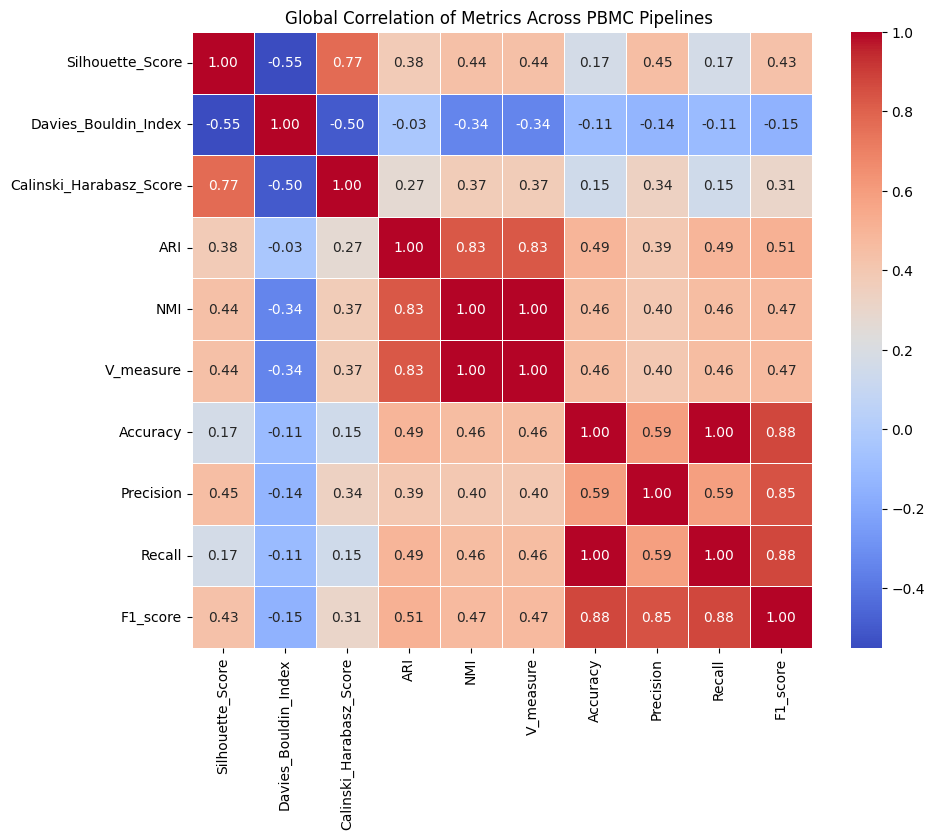

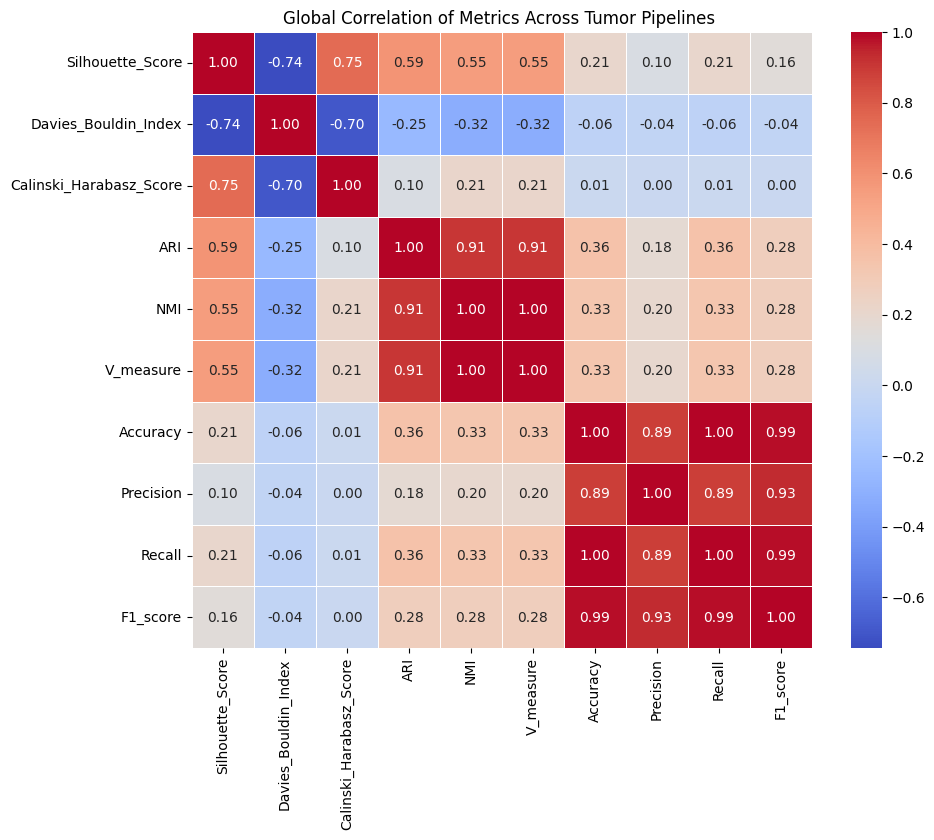

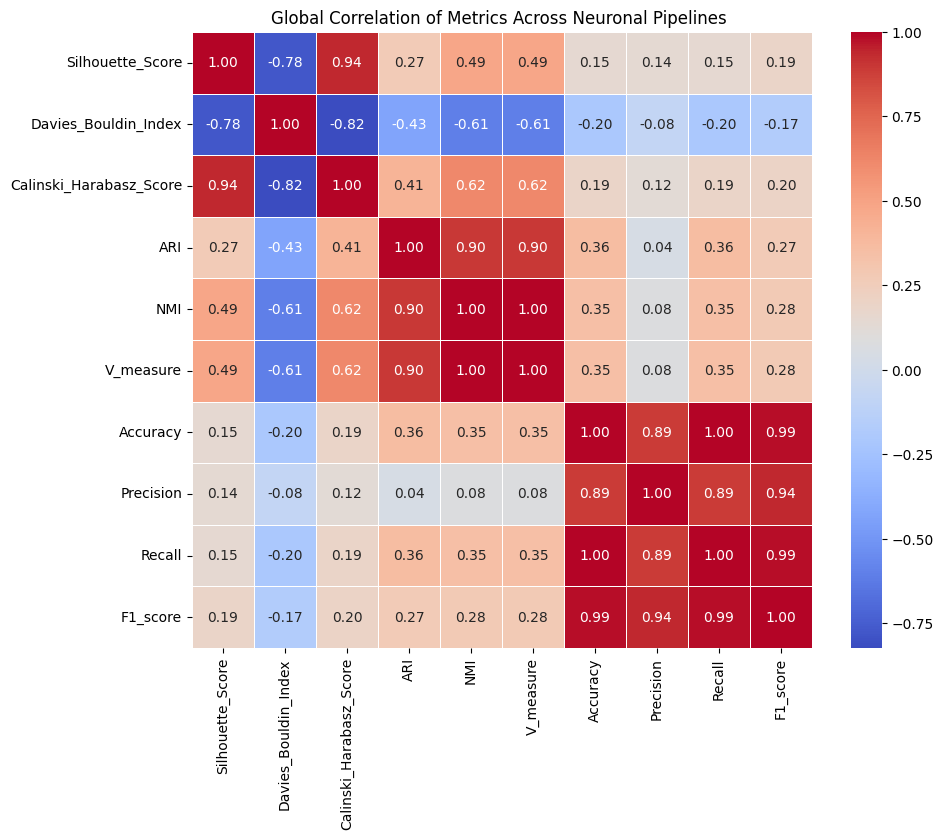

In [35]:
# See correlated metrics
reload(visualization)
visualization.plot_global_heatmap(PBMC_only_metrics, "PBMC")
visualization.plot_global_heatmap(Tumor_only_metrics, "Tumor")
visualization.plot_global_heatmap(Neuronal_only_metrics, "Neuronal")

In [ ]:
# Accuracy

In [ ]:
# Data cleaning

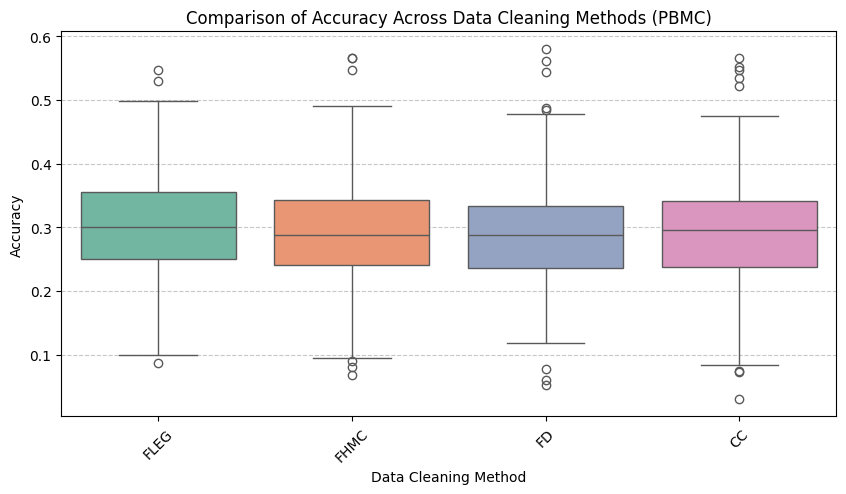

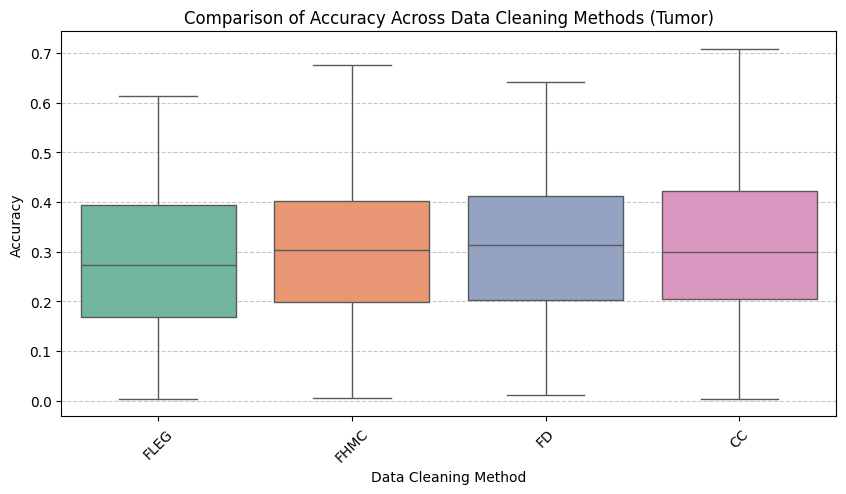

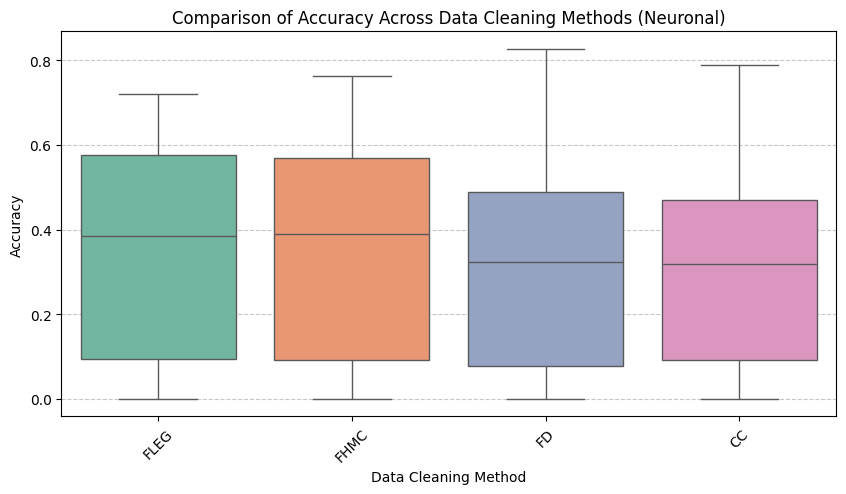

In [40]:
# Boxplots
reload(visualization)
step_methods = ['FLEG', 'FHMC', 'FD', 'CC']
step_position = 0

filtered_results_by_step_PBMC = visualization.filter_by_step(PBMC_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_PBMC, "Data Cleaning", "Accuracy", "PBMC")

filtered_results_by_step_Tumor = visualization.filter_by_step(Tumor_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Tumor, "Data Cleaning", "Accuracy", "Tumor")

filtered_results_by_step_Neuronal = visualization.filter_by_step(Neuronal_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Neuronal, "Data Cleaning", "Accuracy", "Neuronal")

In [ ]:
# Top pipelines


In [ ]:
# Normalization

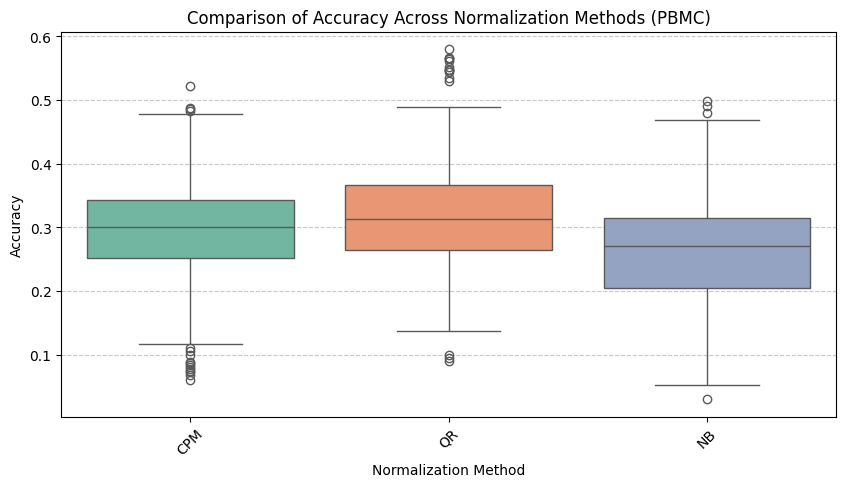

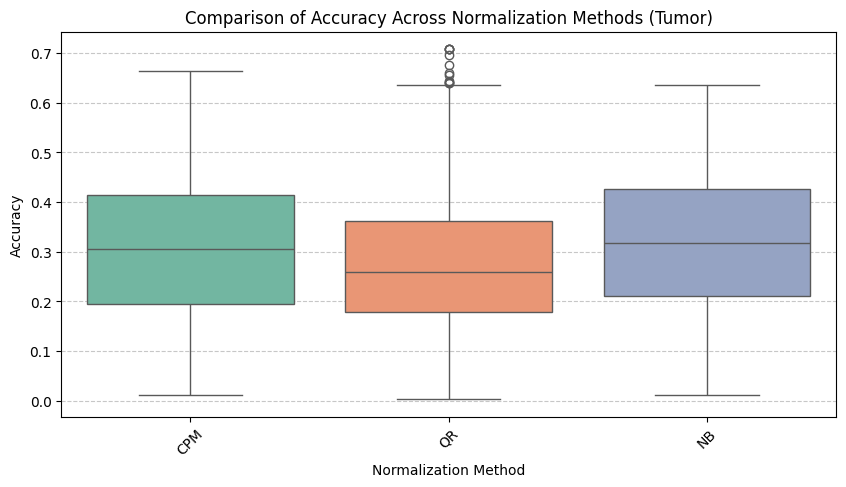

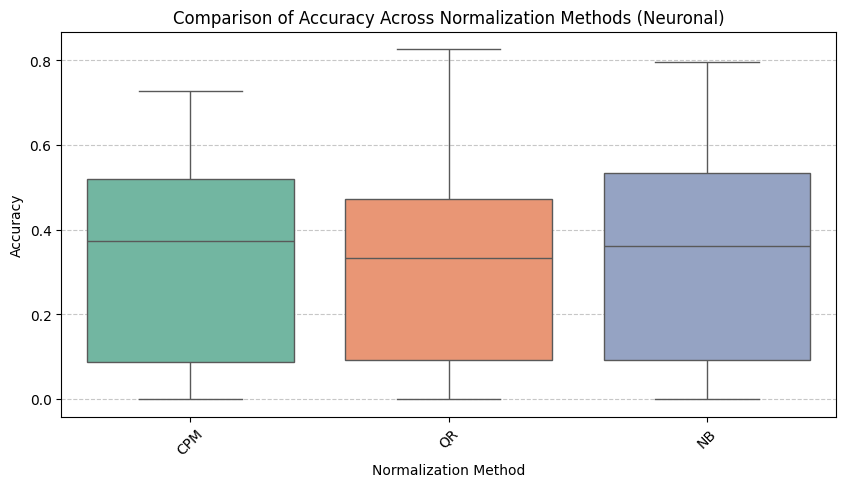

In [41]:
# Boxplots
reload(visualization)
step_methods = ['CPM', 'QR', 'NB']
step_position = 1

filtered_results_by_step_PBMC = visualization.filter_by_step(PBMC_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_PBMC, "Normalization", "Accuracy", "PBMC")

filtered_results_by_step_Tumor = visualization.filter_by_step(Tumor_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Tumor, "Normalization", "Accuracy", "Tumor")

filtered_results_by_step_Neuronal = visualization.filter_by_step(Neuronal_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Neuronal, "Normalization", "Accuracy", "Neuronal")

In [ ]:
# Top pipelines

In [ ]:
# Feature selection

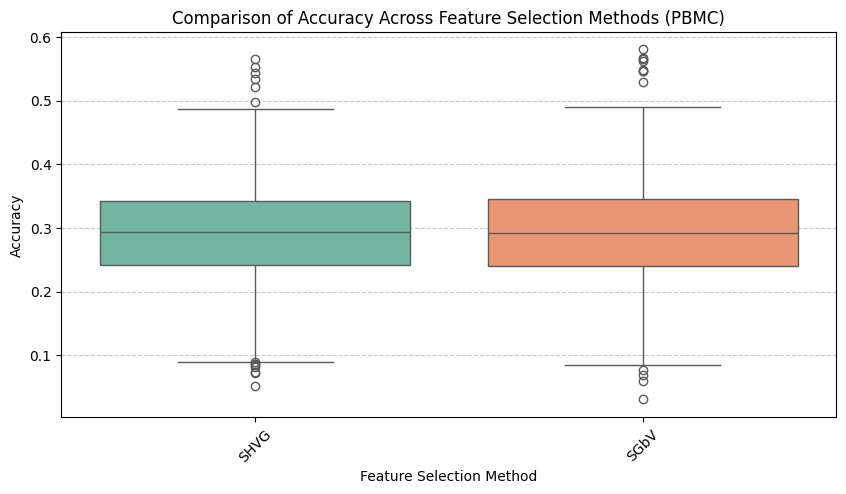

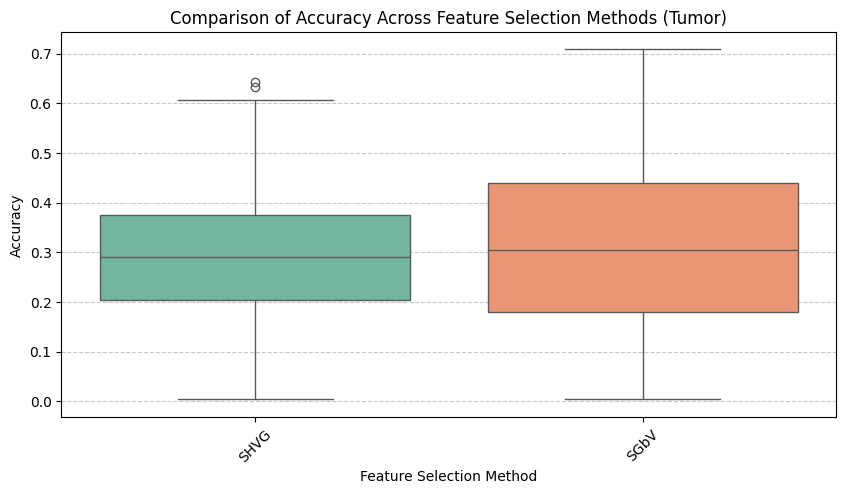

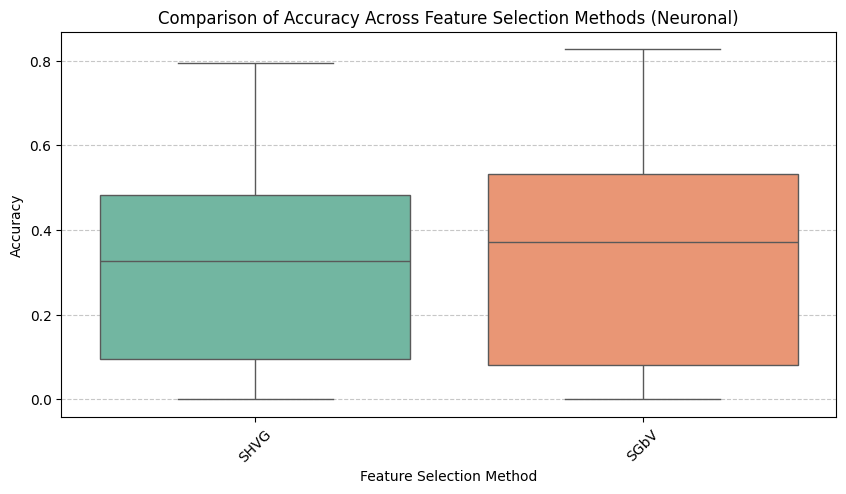

In [42]:
# Boxplots
reload(visualization)
step_methods = ['SHVG', 'SGbV']
step_position = 2

filtered_results_by_step_PBMC = visualization.filter_by_step(PBMC_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_PBMC, "Feature Selection", "Accuracy", "PBMC")

filtered_results_by_step_Tumor = visualization.filter_by_step(Tumor_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Tumor, "Feature Selection", "Accuracy", "Tumor")

filtered_results_by_step_Neuronal = visualization.filter_by_step(Neuronal_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Neuronal, "Feature Selection", "Accuracy", "Neuronal")

In [ ]:
# Top pipelines

In [ ]:
# Dim reduction

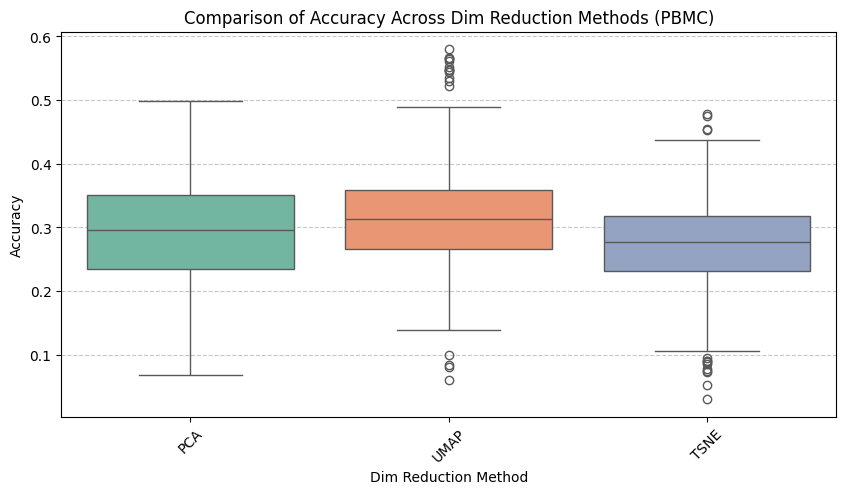

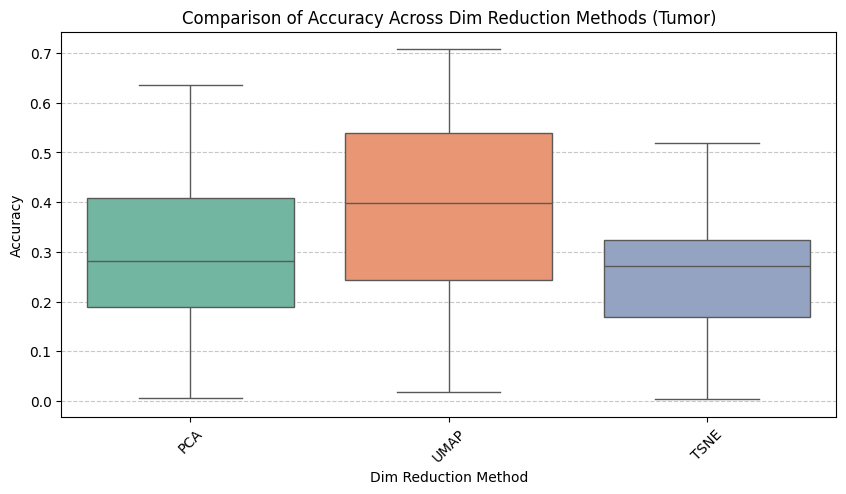

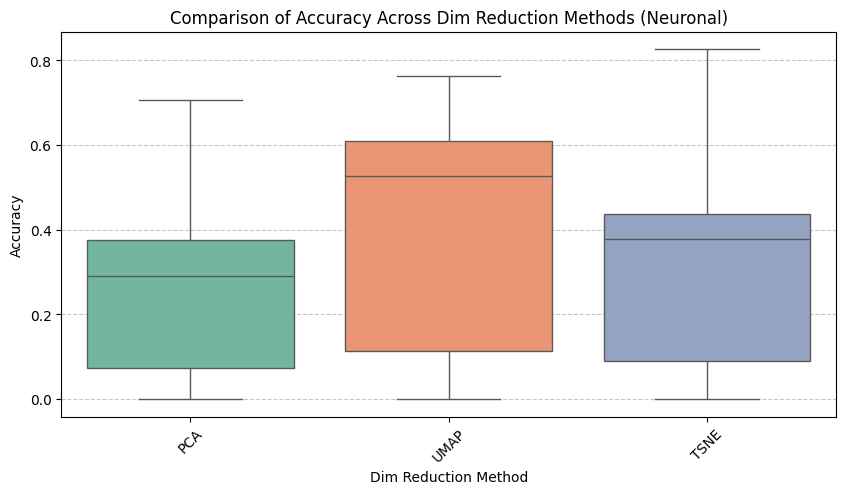

In [43]:
# Boxplots
reload(visualization)
step_methods = ['PCA', 'UMAP', 'TSNE']
step_position = 3

filtered_results_by_step_PBMC = visualization.filter_by_step(PBMC_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_PBMC, "Dim Reduction", "Accuracy", "PBMC")

filtered_results_by_step_Tumor = visualization.filter_by_step(Tumor_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Tumor, "Dim Reduction", "Accuracy", "Tumor")

filtered_results_by_step_Neuronal = visualization.filter_by_step(Neuronal_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Neuronal, "Dim Reduction", "Accuracy", "Neuronal")

In [ ]:
# Top pipelines

In [ ]:
# Clustering

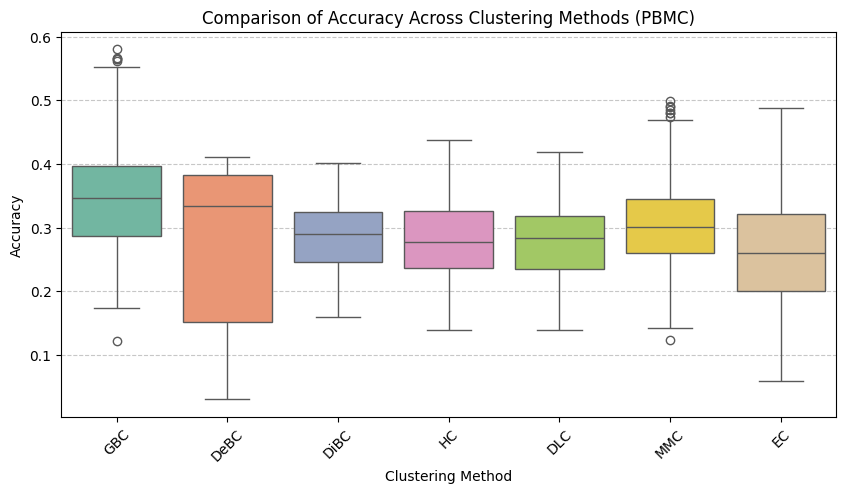

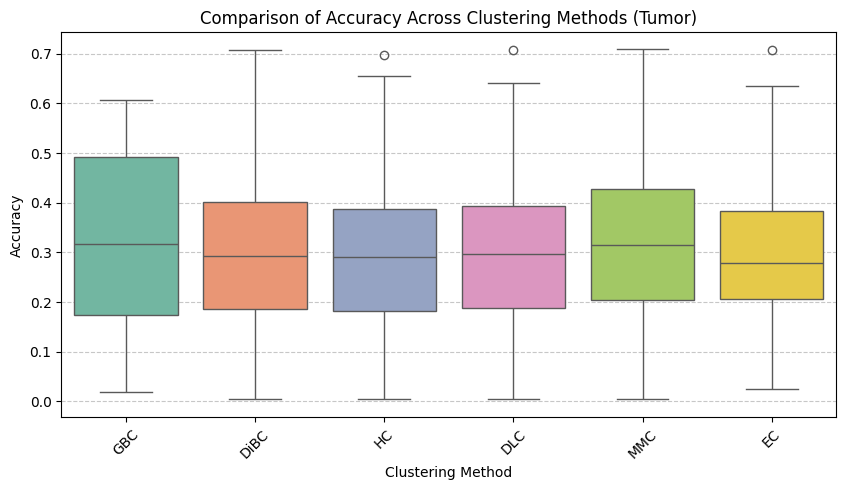

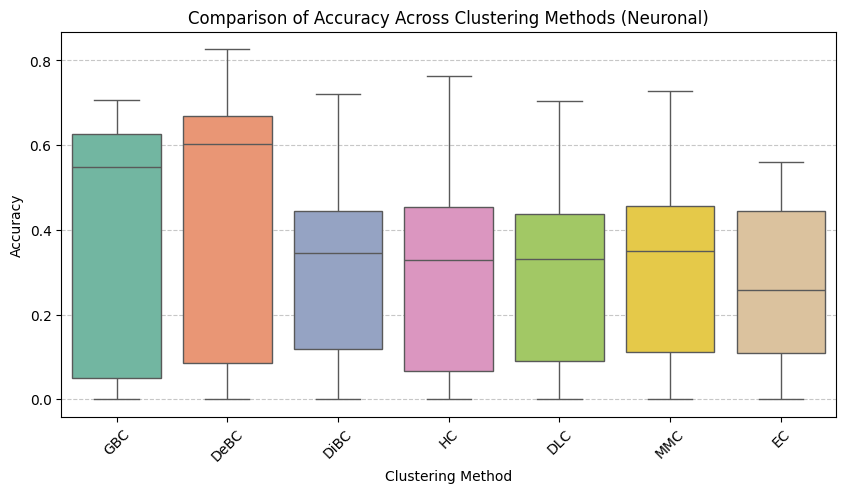

In [44]:
# Boxplots
reload(visualization)
step_methods = ['GBC', 'DeBC', 'DiBC', 'HC', 'DLC', 'MMC', 'EC']
step_position = 4

filtered_results_by_step_PBMC = visualization.filter_by_step(PBMC_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_PBMC, "Clustering", "Accuracy", "PBMC")

filtered_results_by_step_Tumor = visualization.filter_by_step(Tumor_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Tumor, "Clustering", "Accuracy", "Tumor")

filtered_results_by_step_Neuronal = visualization.filter_by_step(Neuronal_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Neuronal, "Clustering", "Accuracy", "Neuronal")

In [ ]:
# Top pipelines

In [ ]:
# Cell identification

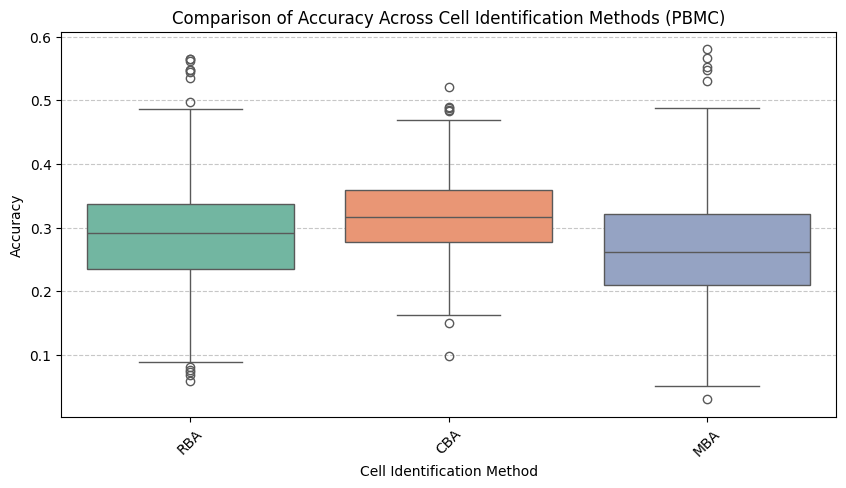

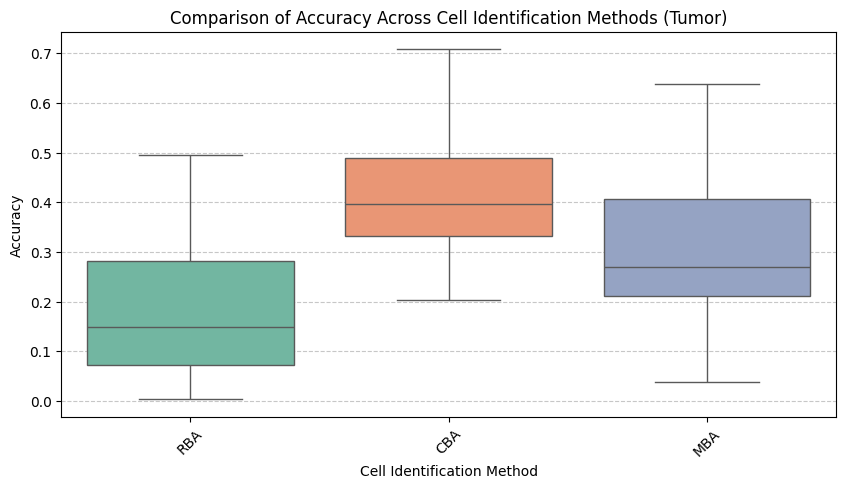

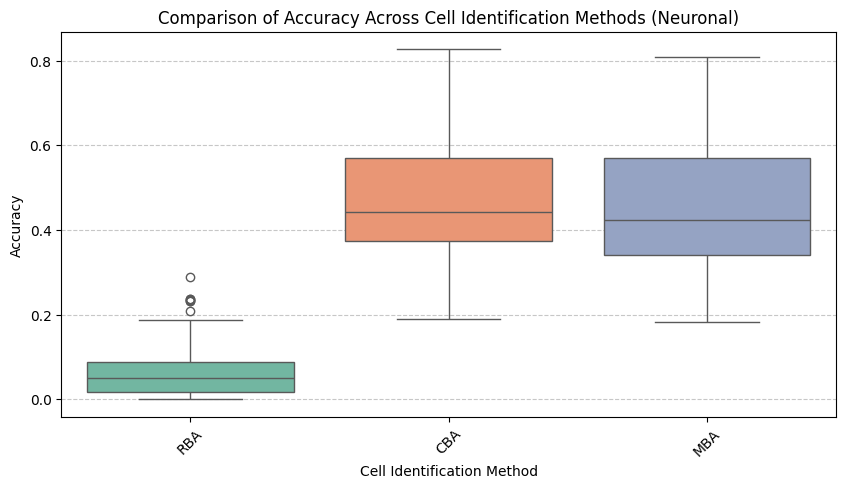

In [45]:
# Boxplots
reload(visualization)
step_methods = ['RBA', 'CBA', 'MBA']
step_position = 5

filtered_results_by_step_PBMC = visualization.filter_by_step(PBMC_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_PBMC, "Cell Identification", "Accuracy", "PBMC")

filtered_results_by_step_Tumor = visualization.filter_by_step(Tumor_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Tumor, "Cell Identification", "Accuracy", "Tumor")

filtered_results_by_step_Neuronal = visualization.filter_by_step(Neuronal_only_metrics, step_methods, step_position)
visualization.plot_metric_by_step(filtered_results_by_step_Neuronal, "Cell Identification", "Accuracy", "Neuronal")

In [ ]:
# Top pipelines

In [ ]:
# Overview top pipelines

In [52]:
reload(visualization)
top_PBMC = visualization.get_top_n_performers(PBMC_only_metrics, "Accuracy", 10)
print(top_PBMC[['pipeline_id', 'Accuracy']])

top_Tumor = visualization.get_top_n_performers(Tumor_only_metrics, "Accuracy", 10)
print(top_Tumor[['pipeline_id', 'Accuracy']])

top_Neuronal = visualization.get_top_n_performers(Neuronal_only_metrics, "Accuracy", 10)
print(top_Neuronal[['pipeline_id', 'Accuracy']])


                    pipeline_id  Accuracy
905     FD_QR_SGbV_UMAP_GBC_MBA  0.580206
1265    CC_QR_SGbV_UMAP_GBC_MBA  0.566040
549   FHMC_QR_SGbV_UMAP_GBC_RBA  0.565505
489   FHMC_QR_SHVG_UMAP_GBC_RBA  0.565286
903     FD_QR_SGbV_UMAP_GBC_RBA  0.561825
1205    CC_QR_SHVG_UMAP_GBC_MBA  0.552192
1263    CC_QR_SGbV_UMAP_GBC_RBA  0.547754
551   FHMC_QR_SGbV_UMAP_GBC_MBA  0.547033
195   FLEG_QR_SGbV_UMAP_GBC_RBA  0.546946
843     FD_QR_SHVG_UMAP_GBC_RBA  0.544043
                     pipeline_id  Accuracy
1000     CC_QR_SGbV_UMAP_MMC_CBA  0.708204
997      CC_QR_SGbV_UMAP_DLC_CBA  0.708083
991     CC_QR_SGbV_UMAP_DiBC_CBA  0.708065
1003      CC_QR_SGbV_UMAP_EC_CBA  0.707996
994       CC_QR_SGbV_UMAP_HC_CBA  0.696928
421   FHMC_QR_SGbV_UMAP_DiBC_CBA  0.675448
343   FHMC_CPM_SGbV_UMAP_MMC_CBA  0.664699
430    FHMC_QR_SGbV_UMAP_MMC_CBA  0.660785
424     FHMC_QR_SGbV_UMAP_HC_CBA  0.655752
952      CC_QR_SHVG_UMAP_MMC_CBA  0.643448
                      pipeline_id  Accuracy
781      FD_QR_SGbV_T

In [62]:
# Checking correct length on DeBC methods
pipeline_id='FD_QR_SGbV_TSNE_DeBC_CBA'
row = Neuronal_results[Neuronal_results['pipeline_id'] == pipeline_id]
barcode_list = row['barcodes'].values[0].split(',')
print(len(barcode_list))

68834


In [ ]:
# Top 1 in each tissue across tissues

In [65]:
# Top PBMC
top1_PBMC = 'FD_QR_SGbV_UMAP_GBC_MBA'
top1_PBMC_in_tissues = {
        "PBMC": PBMC_only_metrics[PBMC_only_metrics['pipeline_id'] == top1_PBMC],
        "Tumor": Tumor_only_metrics[Tumor_only_metrics['pipeline_id'] == top1_PBMC],
        "Neuronal": Neuronal_only_metrics[Neuronal_only_metrics['pipeline_id'] == top1_PBMC]
    }
for tissue, df in top1_PBMC_in_tissues.items():
    print(f"--- {tissue} ---")
    print(df[['pipeline_id', 'Accuracy']])
    print("\n")

--- PBMC ---
                 pipeline_id  Accuracy
905  FD_QR_SGbV_UMAP_GBC_MBA  0.580206


--- Tumor ---
Empty DataFrame
Columns: [pipeline_id, Accuracy]
Index: []


--- Neuronal ---
                 pipeline_id  Accuracy
767  FD_QR_SGbV_UMAP_GBC_MBA  0.561345




In [66]:
# Top Tumor
top1_Tumor = 'CC_QR_SGbV_UMAP_MMC_CBA'
top1_Tumor_in_tissues = {
        "PBMC": PBMC_only_metrics[PBMC_only_metrics['pipeline_id'] == top1_Tumor],
        "Tumor": Tumor_only_metrics[Tumor_only_metrics['pipeline_id'] == top1_Tumor],
        "Neuronal": Neuronal_only_metrics[Neuronal_only_metrics['pipeline_id'] == top1_Tumor]
    }
for tissue, df in top1_Tumor_in_tissues.items():
    print(f"--- {tissue} ---")
    print(df[['pipeline_id', 'Accuracy']])
    print("\n")

--- PBMC ---
                  pipeline_id  Accuracy
1276  CC_QR_SGbV_UMAP_MMC_CBA  0.296001


--- Tumor ---
                  pipeline_id  Accuracy
1000  CC_QR_SGbV_UMAP_MMC_CBA  0.708204


--- Neuronal ---
                  pipeline_id  Accuracy
1078  CC_QR_SGbV_UMAP_MMC_CBA  0.509632




In [67]:
# Top Neuronal
top1_Neuronal = 'FD_QR_SGbV_TSNE_DeBC_CBA'
top1_Neuronal_in_tissues = {
        "PBMC": PBMC_only_metrics[PBMC_only_metrics['pipeline_id'] == top1_Neuronal],
        "Tumor": Tumor_only_metrics[Tumor_only_metrics['pipeline_id'] == top1_Neuronal],
        "Neuronal": Neuronal_only_metrics[Neuronal_only_metrics['pipeline_id'] == top1_Neuronal]
    }
for tissue, df in top1_Neuronal_in_tissues.items():
    print(f"--- {tissue} ---")
    print(df[['pipeline_id', 'Accuracy']])
    print("\n")

--- PBMC ---
                  pipeline_id  Accuracy
925  FD_QR_SGbV_TSNE_DeBC_CBA  0.382571


--- Tumor ---
Empty DataFrame
Columns: [pipeline_id, Accuracy]
Index: []


--- Neuronal ---
                  pipeline_id  Accuracy
781  FD_QR_SGbV_TSNE_DeBC_CBA  0.826655




In [ ]:
# ARI y Silhouette

In [69]:
#PBMC
reload(visualization)
top_PBMC_acc = visualization.get_top_n_performers(PBMC_only_metrics, "Accuracy", 10)[['pipeline_id', 'Accuracy']]
top_PBMC_ari = visualization.get_top_n_performers(PBMC_only_metrics, "ARI", 10)[['pipeline_id', 'ARI']]
top_PBMC_sil = visualization.get_top_n_performers(PBMC_only_metrics, "Silhouette_Score", 10)[['pipeline_id', 'Silhouette_Score']]

# Merge dataframes based on pipeline_ID, keeping all from Accuracy
top_PBMC_3_metrics = top_PBMC_acc.merge(top_PBMC_ari, on="pipeline_id", how="left").merge(top_PBMC_sil, on="pipeline_id", how="left")

# Replace NaN with "-" for clarity in display
top_PBMC_3_metrics.fillna("-", inplace=True)

print(top_PBMC_3_metrics)

                 pipeline_id  Accuracy       ARI Silhouette_Score
0    FD_QR_SGbV_UMAP_GBC_MBA  0.580206  0.288949         0.465317
1    CC_QR_SGbV_UMAP_GBC_MBA  0.566040  0.283462          0.47068
2  FHMC_QR_SGbV_UMAP_GBC_RBA  0.565505         -         0.482488
3  FHMC_QR_SHVG_UMAP_GBC_RBA  0.565286  0.286497                -
4    FD_QR_SGbV_UMAP_GBC_RBA  0.561825  0.288949         0.465317
5    CC_QR_SHVG_UMAP_GBC_MBA  0.552192         -                -
6    CC_QR_SGbV_UMAP_GBC_RBA  0.547754  0.283462          0.47068
7  FHMC_QR_SGbV_UMAP_GBC_MBA  0.547033         -         0.482488
8  FLEG_QR_SGbV_UMAP_GBC_RBA  0.546946  0.280058                -
9    FD_QR_SHVG_UMAP_GBC_RBA  0.544043         -         0.463061


In [82]:
#Tumor
reload(visualization)
top_Tumor_acc = visualization.get_top_n_performers(Tumor_only_metrics, "Accuracy", 10)
top_Tumor_ari = visualization.get_top_n_performers(Tumor_only_metrics, "ARI", 10)
top_Tumor_sil = visualization.get_top_n_performers(Tumor_only_metrics, "Silhouette_Score", 10)

# Merge dataframes based on pipeline_ID, keeping all from Accuracy
top_Tumor_3_metrics = top_Tumor_acc[['pipeline_id', 'Accuracy']].merge(top_Tumor_ari[['pipeline_id', 'ARI']], on="pipeline_id", how="left").merge(top_Tumor_sil[['pipeline_id', 'Silhouette_Score']], on="pipeline_id", how="left")

# Replace NaN with "-" for clarity in display
top_Tumor_3_metrics.fillna("-", inplace=True)

print(top_Tumor_3_metrics)

                  pipeline_id  Accuracy       ARI Silhouette_Score
0     CC_QR_SGbV_UMAP_MMC_CBA  0.708204  0.680644                -
1     CC_QR_SGbV_UMAP_DLC_CBA  0.708083  0.684198                -
2    CC_QR_SGbV_UMAP_DiBC_CBA  0.708065  0.680077                -
3      CC_QR_SGbV_UMAP_EC_CBA  0.707996         -                -
4      CC_QR_SGbV_UMAP_HC_CBA  0.696928         -                -
5  FHMC_QR_SGbV_UMAP_DiBC_CBA  0.675448         -                -
6  FHMC_CPM_SGbV_UMAP_MMC_CBA  0.664699         -                -
7   FHMC_QR_SGbV_UMAP_MMC_CBA  0.660785         -                -
8    FHMC_QR_SGbV_UMAP_HC_CBA  0.655752         -                -
9     CC_QR_SHVG_UMAP_MMC_CBA  0.643448         -                -


In [83]:
# Considerar si tablas para ARI y Silhouete como en el word serian demasiado densas y es mejor o bien
# no hacer mas tablas y simplemente comentar a partir de esa o bien simplemente ver los valores de ARI y Silhouette para
# las del top 10 accuracy para ver un poco sus valores y tomar conclusiones de ahi, sin entrar en los que dan max ARi o
# silhouette por no es tan relevante
print(top_Tumor_acc[['pipeline_id', 'Accuracy', 'ARI']]) # Replicar para Silhouette

                     pipeline_id  Accuracy       ARI
1000     CC_QR_SGbV_UMAP_MMC_CBA  0.708204  0.680644
997      CC_QR_SGbV_UMAP_DLC_CBA  0.708083  0.684198
991     CC_QR_SGbV_UMAP_DiBC_CBA  0.708065  0.680077
1003      CC_QR_SGbV_UMAP_EC_CBA  0.707996  0.679621
994       CC_QR_SGbV_UMAP_HC_CBA  0.696928  0.667069
421   FHMC_QR_SGbV_UMAP_DiBC_CBA  0.675448  0.620544
343   FHMC_CPM_SGbV_UMAP_MMC_CBA  0.664699  0.647732
430    FHMC_QR_SGbV_UMAP_MMC_CBA  0.660785  0.565190
424     FHMC_QR_SGbV_UMAP_HC_CBA  0.655752  0.591936
952      CC_QR_SHVG_UMAP_MMC_CBA  0.643448  0.607848


In [78]:
#Neuronal
reload(visualization)
top_Neuronal_acc = visualization.get_top_n_performers(Neuronal_only_metrics, "Accuracy", 10)
top_Neuronal_ari = visualization.get_top_n_performers(Neuronal_only_metrics, "ARI", 10)
top_Neuronal_sil = visualization.get_top_n_performers(Neuronal_only_metrics, "Silhouette_Score", 10)

# Merge dataframes based on pipeline_ID, keeping all from Accuracy
top_Neuronal_3_metrics = top_Neuronal_acc[['pipeline_id', 'Accuracy']].merge(top_Neuronal_ari[['pipeline_id', 'ARI']], on="pipeline_id", how="left").merge(top_Neuronal_sil[['pipeline_id', 'Silhouette_Score']], on="pipeline_id", how="left")

# Replace NaN with "-" for clarity in display
top_Neuronal_3_metrics.fillna("-", inplace=True)

print(top_Neuronal_3_metrics)

                   pipeline_id  Accuracy       ARI Silhouette_Score
0     FD_QR_SGbV_TSNE_DeBC_CBA  0.826655  0.756932                -
1     FD_QR_SGbV_TSNE_DeBC_MBA  0.808409  0.756932                -
2     FD_NB_SHVG_TSNE_DeBC_MBA  0.795139         -                -
3     CC_QR_SGbV_TSNE_DeBC_CBA  0.789454  0.756607                -
4     CC_NB_SGbV_TSNE_DeBC_CBA  0.788539  0.748426                -
5     CC_NB_SGbV_TSNE_DeBC_MBA  0.766890  0.748426                -
6     FHMC_NB_SGbV_UMAP_HC_MBA  0.762926         -                -
7   FHMC_CPM_SGbV_UMAP_MMC_MBA  0.727386         -                -
8  FLEG_CPM_SGbV_UMAP_DiBC_MBA  0.721101         -                -
9    FD_CPM_SGbV_TSNE_DeBC_MBA  0.710378         -                -


In [80]:
print(top_Neuronal_acc[['pipeline_id', 'Accuracy', 'Silhouette_Score']]) # Replicar para ARI

                      pipeline_id  Accuracy  Silhouette_Score
781      FD_QR_SGbV_TSNE_DeBC_CBA  0.826655          0.046409
782      FD_QR_SGbV_TSNE_DeBC_MBA  0.808409          0.046409
683      FD_NB_SHVG_TSNE_DeBC_MBA  0.795139         -0.005110
1087     CC_QR_SGbV_TSNE_DeBC_CBA  0.789454          0.040413
1135     CC_NB_SGbV_TSNE_DeBC_CBA  0.788539          0.059599
1136     CC_NB_SGbV_TSNE_DeBC_MBA  0.766890          0.059599
524      FHMC_NB_SGbV_UMAP_HC_MBA  0.762926          0.631766
440    FHMC_CPM_SGbV_UMAP_MMC_MBA  0.727386          0.617027
161   FLEG_CPM_SGbV_UMAP_DiBC_MBA  0.721101          0.637353
734     FD_CPM_SGbV_TSNE_DeBC_MBA  0.710378          0.007722


In [ ]:
# Plot de espacio de dim con top 1 pipelines por tejido vs true labels

In [23]:
reload(visualization)
data_cleaning_methods = ['FLEG', 'FHMC', 'FD', 'CC']
step_position = 0

filtered_results_cleaning = visualization.filter_by_step(filtered_barcode_length, data_cleaning_methods, step_position)
print(filtered_results_cleaning.keys())
visualization.plot_metric_by_step(filtered_results_cleaning, "Data Cleaning", "Accuracy")

dict_keys(['FLEG', 'FHMC', 'FD', 'CC'])


In [24]:
reload(visualization)
top_10 = visualization.get_top_performers(filtered_results_cleaning, "Accuracy", True)
print(top_10.head())
best_pipeline = top_10.iloc[0]

                    pipeline_id  \
875     FD_QR_SGbV_UMAP_GBC_MBA   
1217    CC_QR_SGbV_UMAP_GBC_MBA   
531   FHMC_QR_SGbV_UMAP_GBC_RBA   
474   FHMC_QR_SHVG_UMAP_GBC_RBA   
873     FD_QR_SGbV_UMAP_GBC_RBA   

                                               barcodes  \
875   AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...   
1217  AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...   
531   AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...   
474   AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...   
873   AAACATACACCCAA-1,AAACATACCCCTCA-1,AAACATACCGGA...   

                                               clusters  \
875   1,0,1,0,0,0,2,0,2,0,0,2,1,1,1,1,1,0,0,6,2,1,0,...   
1217  1,0,1,0,0,0,2,0,2,0,0,2,1,1,1,1,0,0,0,6,2,1,0,...   
531   1,0,1,3,0,0,0,2,0,2,0,0,2,1,1,1,1,0,0,0,6,2,1,...   
474   1,0,1,3,0,0,0,1,0,2,0,0,1,1,1,1,1,1,0,0,6,2,1,...   
873   1,0,1,0,0,0,2,0,2,0,0,2,1,1,1,1,1,0,0,6,2,1,0,...   

                                             cell_types  Silhouette_Score  \
87

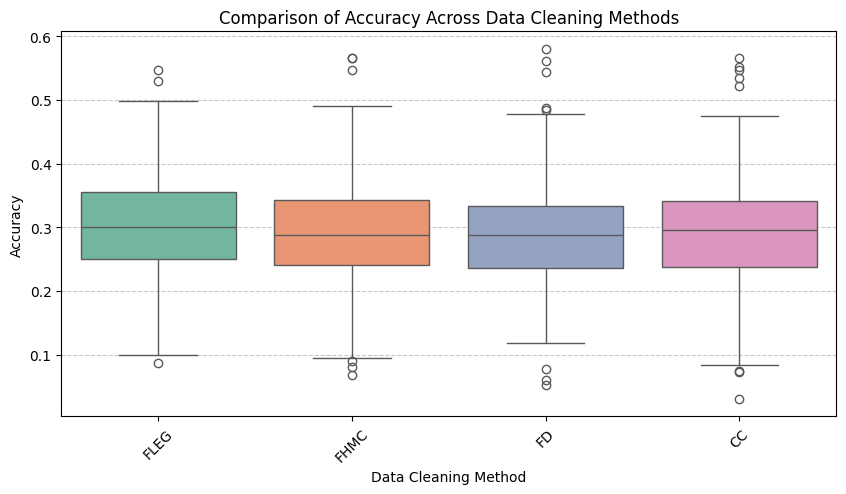

In [25]:
reload(visualization)
visualization.plot_metric_by_step(filtered_results_cleaning, "Data Cleaning", "Accuracy")

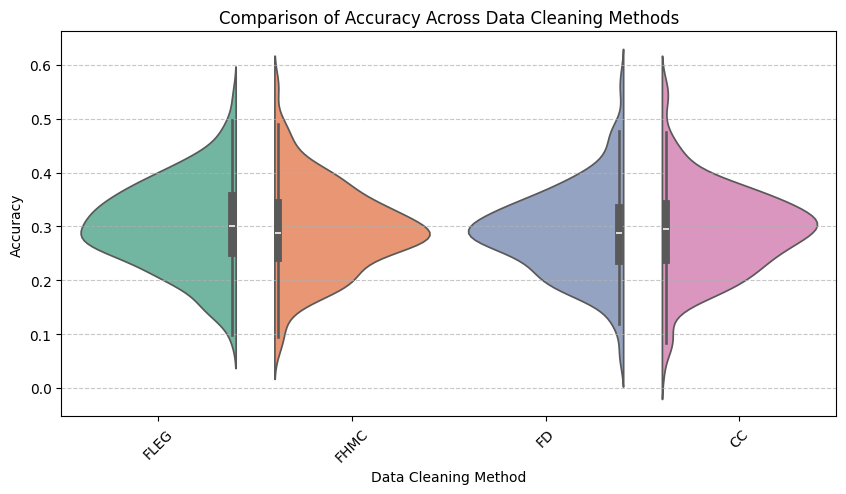

In [29]:
reload(visualization)
visualization.plot_metric_by_step(filtered_results_cleaning, "Data Cleaning", "Accuracy", "violin")

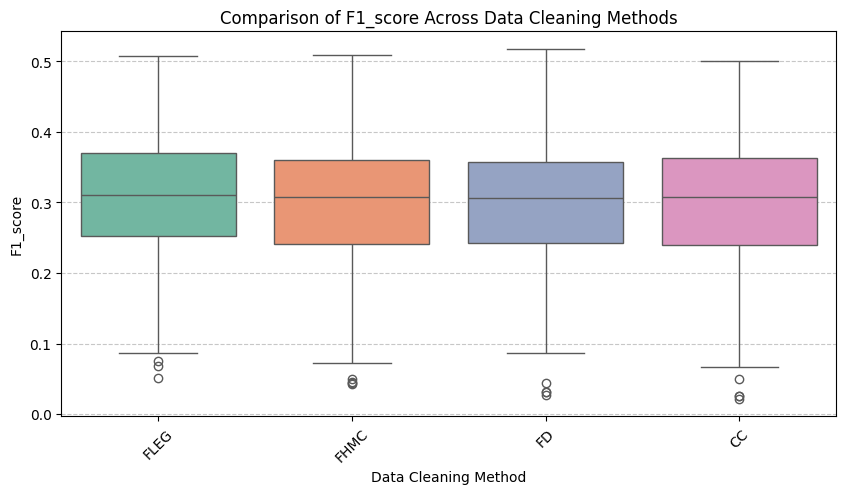

In [26]:
reload(visualization)
visualization.plot_metric_by_step(filtered_results_cleaning, "Data Cleaning", "F1_score")

In [27]:
reload(visualization)
normalization_methods = ['CPM', 'QR', 'NB']
step_position = 1

filtered_results_norm = visualization.filter_by_step(filtered_barcode_length, normalization_methods, step_position)
print(filtered_results_norm.keys())

dict_keys(['CPM', 'QR', 'NB'])


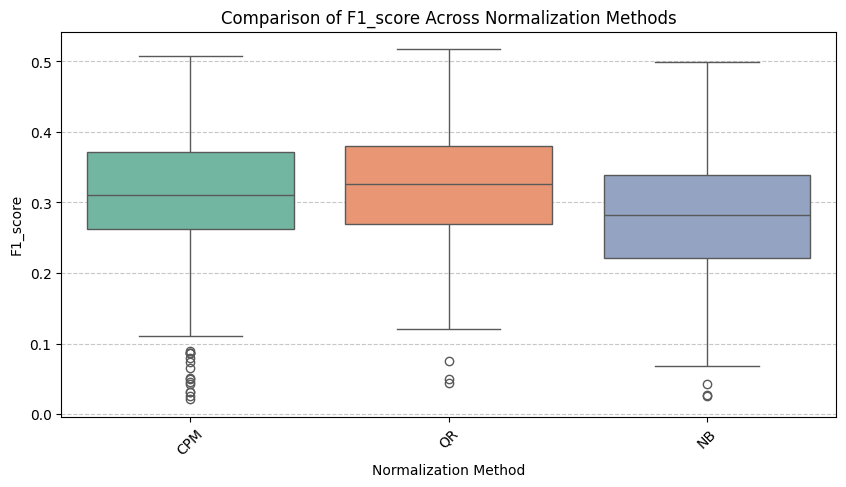

In [28]:
reload(visualization)
visualization.plot_metric_by_step(filtered_results_norm, "Normalization", "F1_score")

In [30]:
reload(visualization)
only_metrics = visualization.filter_metrics(filtered_barcode_length)
print(only_metrics.head())

                  pipeline_id  Silhouette_Score  Davies_Bouldin_Index  \
0   FLEG_CPM_SHVG_PCA_GBC_RBA          0.125175              1.436193   
1   FLEG_CPM_SHVG_PCA_GBC_CBA          0.125175              1.436193   
2   FLEG_CPM_SHVG_PCA_GBC_MBA          0.125175              1.436193   
3  FLEG_CPM_SHVG_PCA_DiBC_RBA          0.140337              1.485316   
4  FLEG_CPM_SHVG_PCA_DiBC_CBA          0.140337              1.485316   

   Calinski_Harabasz_Score  ARI  NMI  V_measure  Accuracy  Precision  \
0              8886.548710  1.0  1.0        1.0  0.362866   0.466590   
1              8886.548710  1.0  1.0        1.0  0.399364   0.484784   
2              8886.548710  1.0  1.0        1.0  0.392861   0.466804   
3             12076.376726  1.0  1.0        1.0  0.329795   0.504407   
4             12076.376726  1.0  1.0        1.0  0.380131   0.481588   

     Recall  F1_score  
0  0.362866  0.338632  
1  0.399364  0.380556  
2  0.392861  0.384483  
3  0.329795  0.379279  
4  0.380

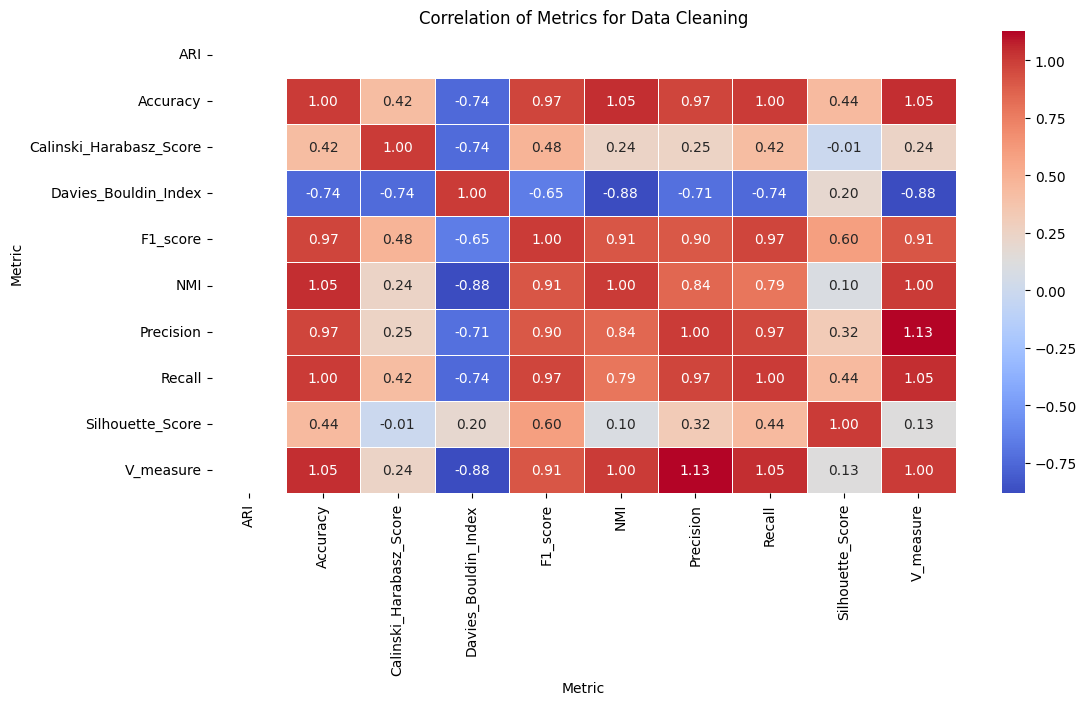

In [33]:
reload(visualization)
only_metrics_cleaning = visualization.filter_metrics_by_step(filtered_results_cleaning)
visualization.plot_heatmap_by_step(only_metrics_cleaning, "Data Cleaning")

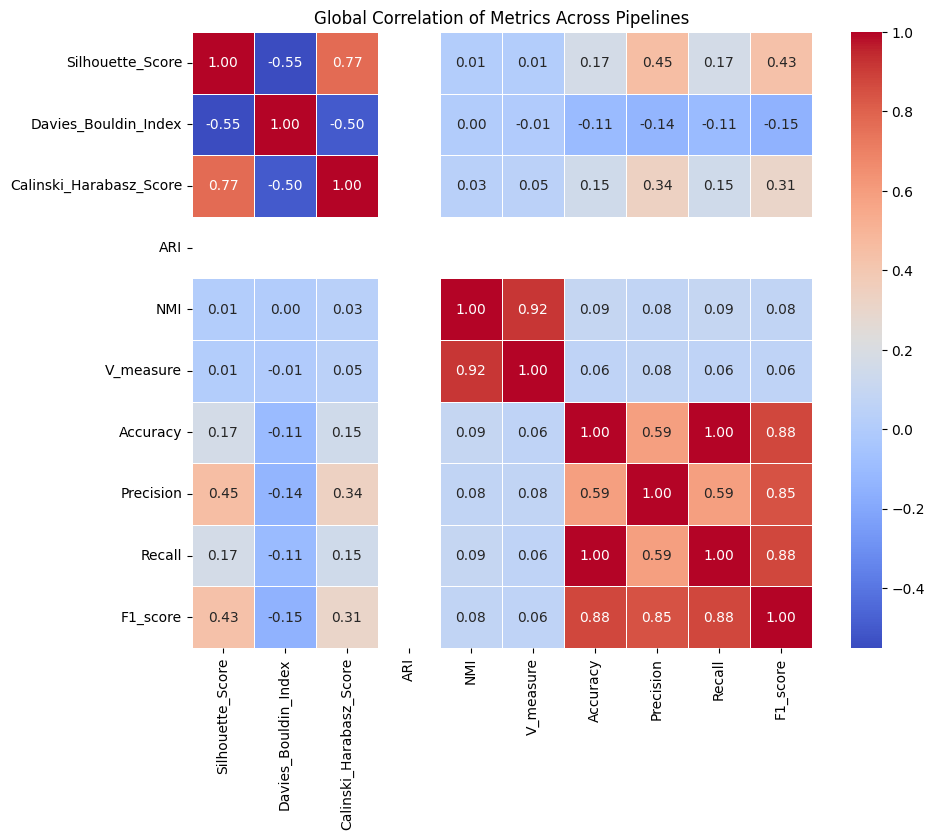

In [31]:
reload(visualization)
visualization.plot_global_heatmap(only_metrics)

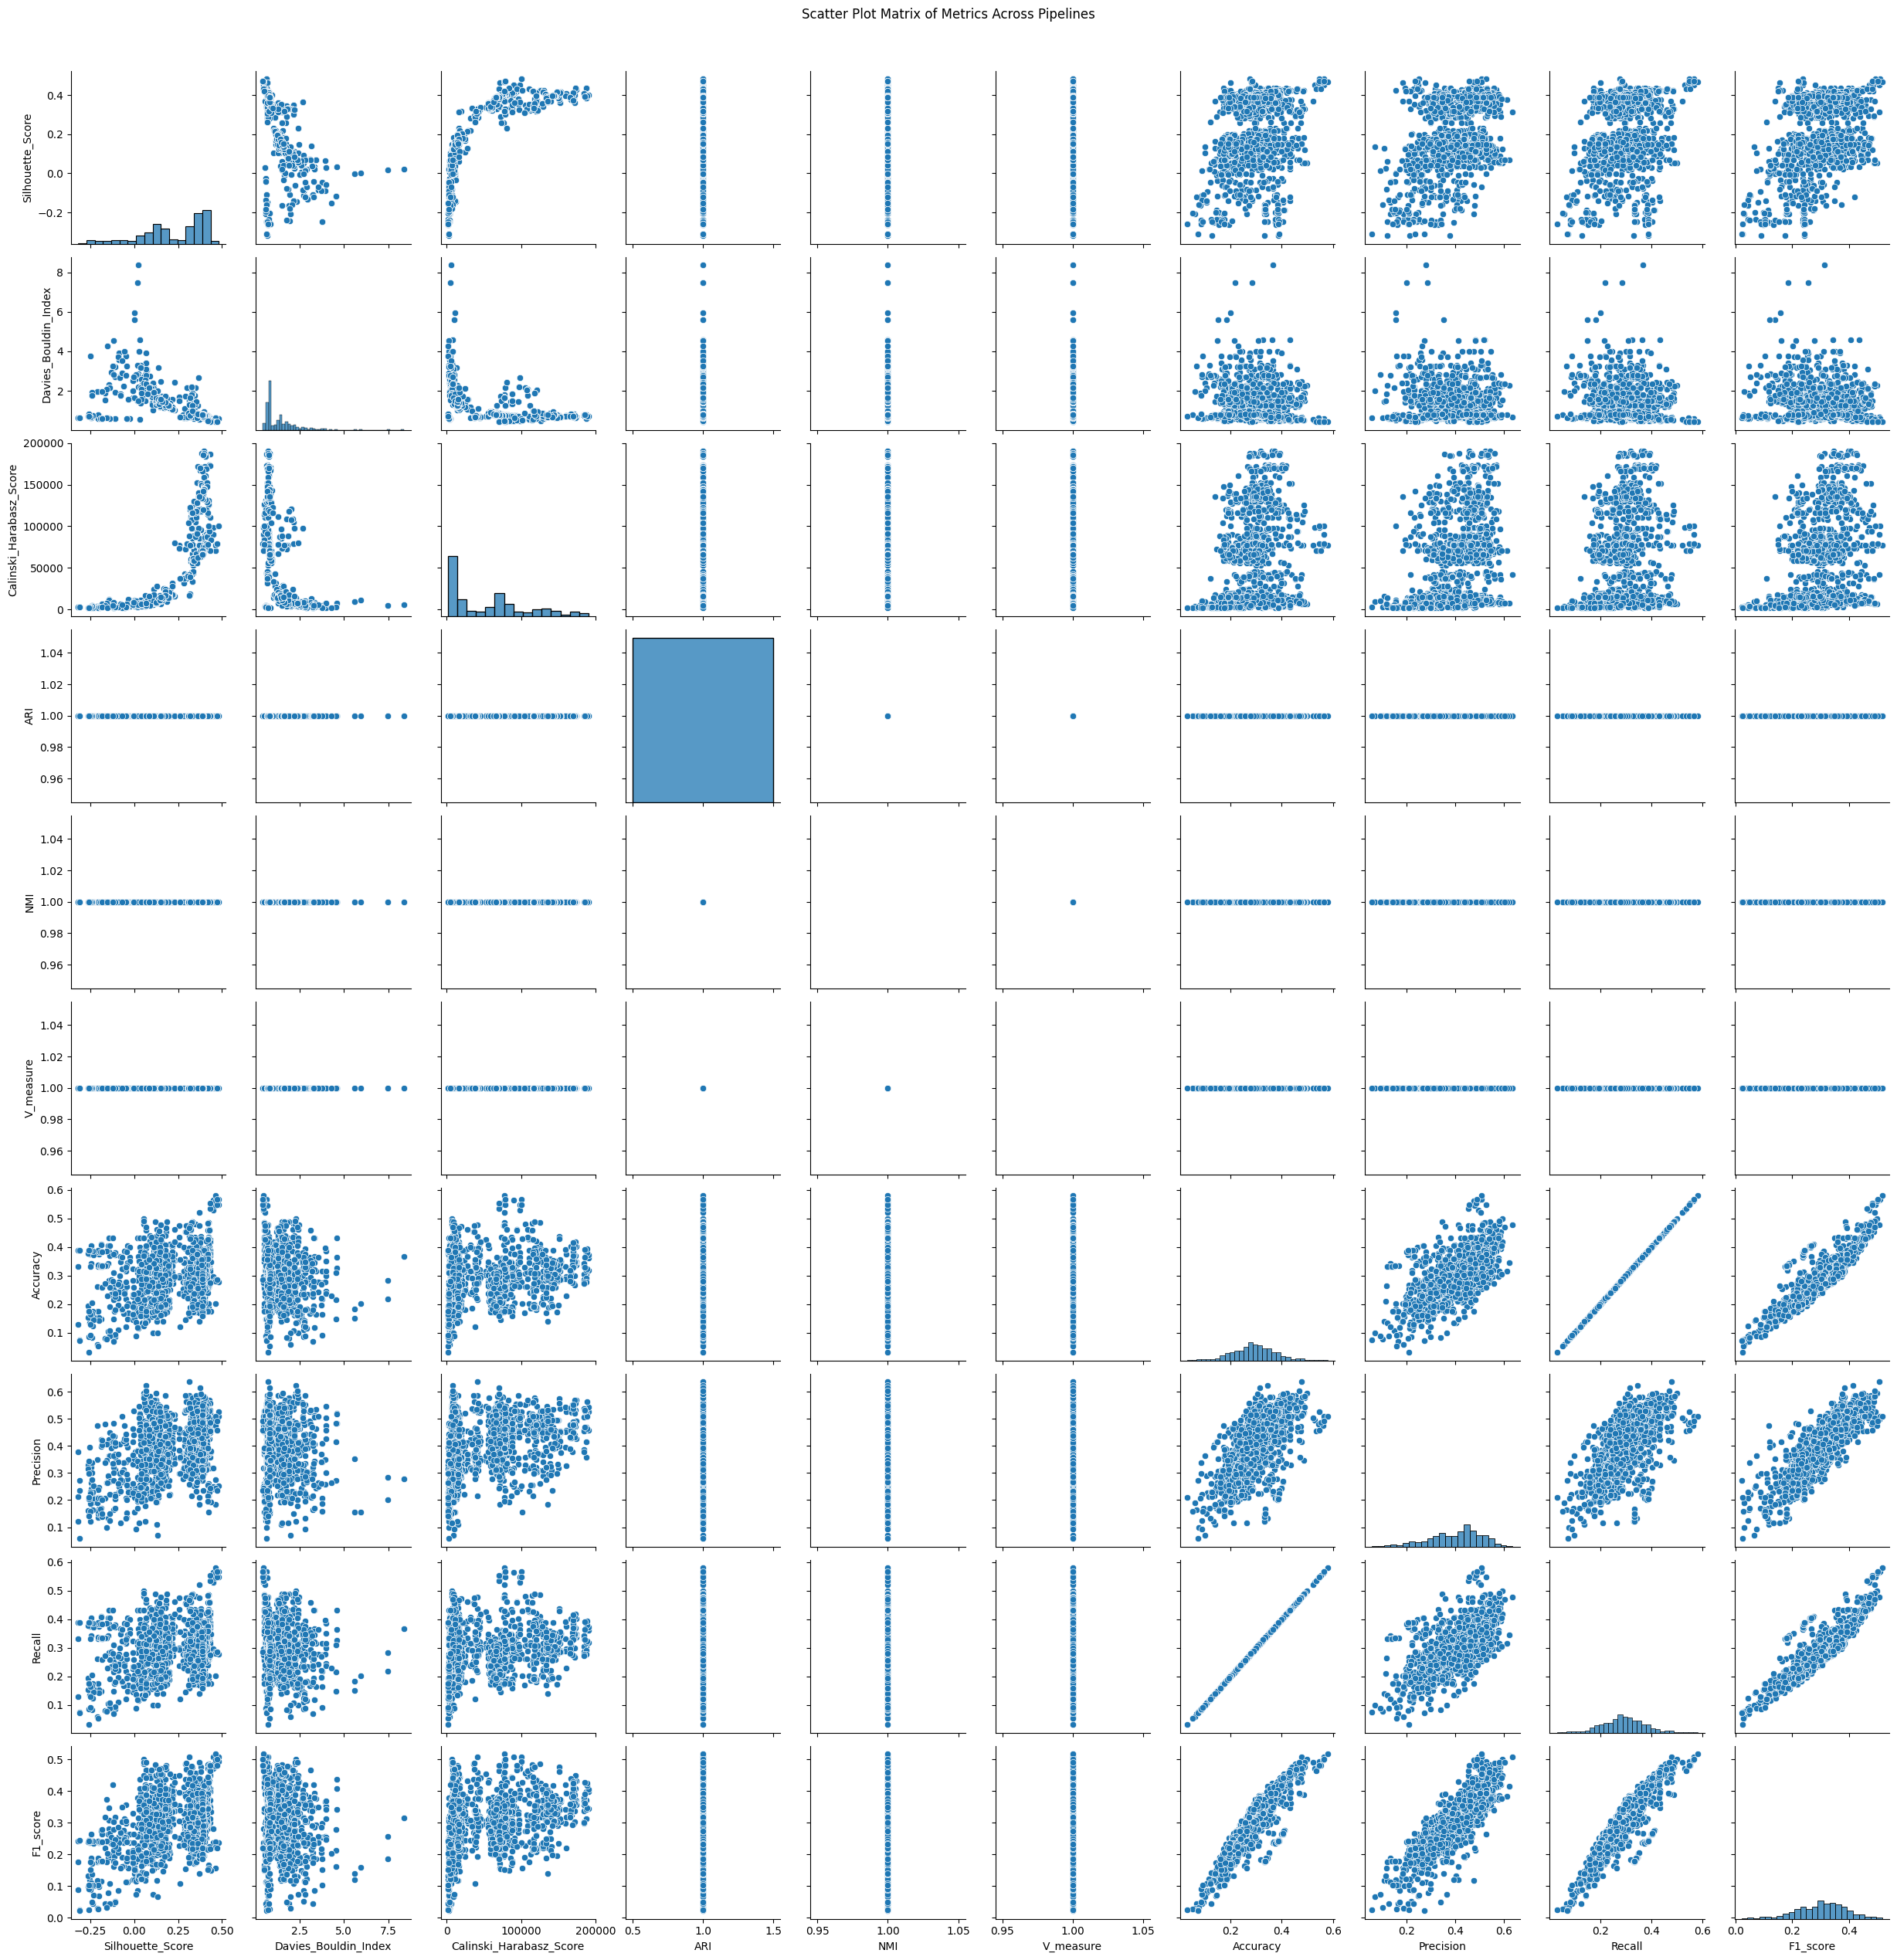

In [32]:
reload(visualization)
visualization.plot_global_scatter(only_metrics)

In [35]:
# Calculate correct metrics for PBMC
metadata_path = "./data/PBMC/PBMC_68k/hg19/68k_pbmc_barcodes_annotation.tsv"
true_labels = evaluation.load_true_labels(metadata_path, "barcodes", "celltype", "\t")
print(true_labels.info())
print(true_labels.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68579 entries, 0 to 68578
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   barcode     68579 non-null  object
 1   true_label  68579 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB
None
            barcode                    true_label
0  AAACATACACCCAA-1              CD8+ Cytotoxic T
1  AAACATACCCCTCA-1  CD8+/CD45RA+ Naive Cytotoxic
2  AAACATACCGGAGA-1           CD4+/CD45RO+ Memory
3  AAACATACTAACCG-1                       CD19+ B
4  AAACATACTCTTCA-1               CD4+/CD25 T Reg


In [39]:
reload(evaluation)
def update_metrics_from_csv(csv_df, true_labels_df):
    """
    Update ARI, NMI, and V-measure in a dataframe by recalculating them with true labels.
    
    Parameters:
    -----------
    csv_df : pd.DataFrame
        Dataframe containing clustering results from the CSV file.
    true_labels_df : pd.DataFrame
        Dataframe containing the true cell type labels with:
        - 'barcode': Cell barcodes.
        - 'true_label': Correct cell types.

    Returns:
    --------
    pd.DataFrame
        Updated dataframe with recalculated metrics.
    """
    updated_rows = []
    
    for _, row in csv_df.iterrows():
        # Convert comma-separated strings back to lists
        barcodes = row['barcodes'].split(',')
        predicted_cell_types = row['cell_types'].split(',')
        
        # Create dataframe for evaluation
        results_df = pd.DataFrame({
            'barcode': barcodes,
            'celltype': predicted_cell_types
        })
        
        # Compute new metrics
        metrics = evaluation.internal_metrics(results_df, true_labels_df)
        
        # Update row values
        row['ARI'] = metrics['ARI']
        row['NMI'] = metrics['NMI']
        row['V_measure'] = metrics['V_measure']
        updated_rows.append(row)
    
    return pd.DataFrame(updated_rows)

updated_results_df = update_metrics_from_csv(PBMC_results, true_labels)
print(updated_results_df.iloc[-1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [40]:
# Save results
updated_results_df.to_csv("./results/PBMC_results/PBMC_correct_results.csv", index=False, header=True)

In [54]:
%whos

Variable                    Type        Data/Info
-------------------------------------------------
best_pipeline               Series      pipeline_id              <...>nName: 875, dtype: object
cell_identification         module      <module 'src.analysis.cel<...>\cell_identification.py'>
clustering                  module      <module 'src.analysis.clu<...>analysis\\clustering.py'>
data_cleaning               module      <module 'src.preprocessin<...>ssing\\data_cleaning.py'>
data_cleaning_methods       list        n=4
dim_reduction               module      <module 'src.preprocessin<...>ssing\\dim_reduction.py'>
dropped_pipelines           list        n=54
evaluation                  module      <module 'src.evaluation.e<...>aluation\\evaluation.py'>
feature_selection           module      <module 'src.preprocessin<...>g\\feature_selection.py'>
filtered_results_cleaning   dict        n=4
filtered_results_norm       dict        n=3
load_results                function    <function l

In [53]:
del top_10

In [46]:
# Calculate correct metrics for Tumor
metadata_path = "./data/Tumor/metadata_all.csv"
true_labels_tumor = evaluation.load_true_labels(metadata_path, "Unnamed: 0", "celltype_major", ",")
print(true_labels_tumor.info())
print(true_labels_tumor.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72410 entries, 0 to 72409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   barcode     72410 non-null  object
 1   true_label  72410 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None
                    barcode   true_label
0  CID3586_AAGACCTCAGCATGAG  Endothelial
1  CID3586_AAGGTTCGTAGTACCT  Endothelial
2  CID3586_ACCAGTAGTTGTGGCC  Endothelial
3  CID3586_ACCCACTAGATGTCGG  Endothelial
4  CID3586_ACTGATGGTCAACTGT  Endothelial


In [47]:
Tumor_results = load_results("./results", "Tumor")
print("Results loaded")

Results loaded


In [48]:
reload(evaluation)
def update_metrics_from_csv(csv_df, true_labels_df):
    """
    Update ARI, NMI, and V-measure in a dataframe by recalculating them with true labels.
    
    Parameters:
    -----------
    csv_df : pd.DataFrame
        Dataframe containing clustering results from the CSV file.
    true_labels_df : pd.DataFrame
        Dataframe containing the true cell type labels with:
        - 'barcode': Cell barcodes.
        - 'true_label': Correct cell types.

    Returns:
    --------
    pd.DataFrame
        Updated dataframe with recalculated metrics.
    """
    updated_rows = []
    
    for _, row in csv_df.iterrows():
        # Convert comma-separated strings back to lists
        barcodes = row['barcodes'].split(',')
        predicted_cell_types = row['cell_types'].split(',')
        
        # Create dataframe for evaluation
        results_df = pd.DataFrame({
            'barcode': barcodes,
            'celltype': predicted_cell_types
        })
        
        # Compute new metrics
        metrics = evaluation.internal_metrics(results_df, true_labels_df)
        
        # Update row values
        row['ARI'] = metrics['ARI']
        row['NMI'] = metrics['NMI']
        row['V_measure'] = metrics['V_measure']
        updated_rows.append(row)
    
    return pd.DataFrame(updated_rows)

updated_results_tumor = update_metrics_from_csv(Tumor_results, true_labels_tumor)
print(updated_results_tumor.iloc[-1])

pipeline_id                                          CC_NB_SGbV_TSNE_MMC_MBA
barcodes                   CID3586_AAACCTGAGAGTAATC,CID3586_AAACCTGAGGCTC...
clusters                   2,3,5,3,1,1,5,2,2,0,2,5,8,3,3,2,3,3,6,3,3,3,5,...
cell_types                 PVL,CAFs,T-cells,CAFs,Myeloid,Myeloid,T-cells,...
Silhouette_Score                                                    0.361498
Davies_Bouldin_Index                                                0.842271
Calinski_Harabasz_Score                                         45772.844356
ARI                                                                  0.31419
NMI                                                                 0.524201
V_measure                                                           0.524201
Accuracy                                                            0.250565
Precision                                                           0.468673
Recall                                                              0.250565

In [49]:
# Save results
updated_results_tumor.to_csv("./results/Tumor_results/Tumor_correct_results.csv", index=False, header=True)

In [55]:
# Calculate correct metrics for Neuronal
metadata_path = "./data/Neuronal/M1/metadata.csv"
true_labels_neuronal = evaluation.load_true_labels(metadata_path, "sample_name", "subclass_label", ",")
print(true_labels_neuronal.info())
print(true_labels_neuronal.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76533 entries, 0 to 76532
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   barcode     76533 non-null  object
 1   true_label  76533 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None
                               barcode true_label
0  AAACCCAAGGATTTCC-LKTX_190129_01_A01        Sst
1  AAACCCAAGTATGGCG-LKTX_190129_01_A01    L5/6 NP
2  AAACCCACAAAGTGTA-LKTX_190129_01_A01      L5 IT
3  AAACCCACACTACTTT-LKTX_190129_01_A01    L2/3 IT
4  AAACCCACAGTGAGCA-LKTX_190129_01_A01      Oligo


In [56]:
Neuronal_results = load_results("./results", "Neuronal")
print("Results loaded")

Results loaded


In [57]:
reload(evaluation)
def update_metrics_from_csv(csv_df, true_labels_df):
    """
    Update ARI, NMI, and V-measure in a dataframe by recalculating them with true labels.
    
    Parameters:
    -----------
    csv_df : pd.DataFrame
        Dataframe containing clustering results from the CSV file.
    true_labels_df : pd.DataFrame
        Dataframe containing the true cell type labels with:
        - 'barcode': Cell barcodes.
        - 'true_label': Correct cell types.

    Returns:
    --------
    pd.DataFrame
        Updated dataframe with recalculated metrics.
    """
    updated_rows = []
    
    for _, row in csv_df.iterrows():
        # Convert comma-separated strings back to lists
        barcodes = row['barcodes'].split(',')
        predicted_cell_types = row['cell_types'].split(',')
        
        # Create dataframe for evaluation
        results_df = pd.DataFrame({
            'barcode': barcodes,
            'celltype': predicted_cell_types
        })
        
        # Compute new metrics
        metrics = evaluation.internal_metrics(results_df, true_labels_df)
        
        # Update row values
        row['ARI'] = metrics['ARI']
        row['NMI'] = metrics['NMI']
        row['V_measure'] = metrics['V_measure']
        updated_rows.append(row)
    
    return pd.DataFrame(updated_rows)

updated_results_neuronal = update_metrics_from_csv(Neuronal_results, true_labels_neuronal)
print(updated_results_neuronal.iloc[-1])

pipeline_id                                          CC_NB_SGbV_TSNE_MMC_MBA
barcodes                   AAACCCAAGGATTTCC-LKTX_190129_01_A01,AAACCCAAGT...
clusters                   12,5,13,11,14,6,9,11,10,7,13,15,7,17,18,13,13,...
cell_types                 Sst,L5/6 NP,L5 IT,L6 CT,Sst Chodl,Oligo,L6 IT,...
Silhouette_Score                                                    0.399042
Davies_Bouldin_Index                                                0.798769
Calinski_Harabasz_Score                                         65943.122359
ARI                                                                 0.353751
NMI                                                                 0.723987
V_measure                                                           0.723987
Accuracy                                                             0.38789
Precision                                                           0.861269
Recall                                                               0.38789

In [58]:
# Save results
updated_results_neuronal.to_csv("./results/Neuronal_results/Neuronal_correct_results.csv", index=False, header=True)